# Feature Tools Exploration #

Evan Solomonides

In [1]:
import featuretools as ft
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.parser import parse
import pandas as pd

In [2]:
data = ft.demo.load_mock_customer()

In [3]:
customers = data["customers"]

In [4]:
sessions = data["sessions"]

In [5]:
transactions = data["transactions"]

In [6]:
entities = {"customers" : (customers, "customer_id"), "sessions" : (sessions, "session_id", "session_start"), "transactions" : (transactions, "transaction_id", "transaction_time")}

In [7]:
relationships = [("sessions", "session_id", "transactions", "session_id"), ("customers", "customer_id", "sessions", "customer_id")]

In [8]:
feature_matrix_customers, features_defs = ft.dfs(entities=entities, relationships=relationships, target_entity="customers")
print feature_matrix_customers.head(5)

            zip_code  COUNT(transactions)  COUNT(sessions)  \
customer_id                                                  
1              60091                  131               10   
2              02139                  122                8   
3              02139                   78                5   
4              60091                  111                8   
5              02139                   58                4   

             SUM(transactions.amount) MODE(sessions.device)  \
customer_id                                                   
1                            10236.77               desktop   
2                             9118.81                mobile   
3                             5758.24               desktop   
4                             8205.28               desktop   
5                             4571.37                tablet   

             MIN(transactions.amount)  MAX(transactions.amount)  \
customer_id                                             

Index([u'customer_id', u'zip_code', u'join_date'], dtype='object')
<type 'numpy.int32'>     5


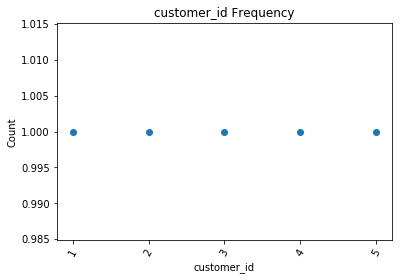

<type 'str'>     5


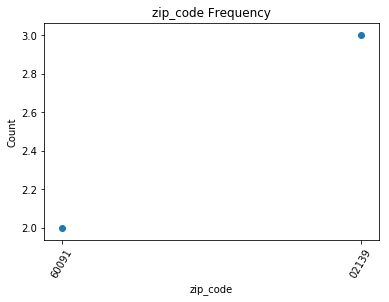

<class 'pandas._libs.tslibs.timestamps.Timestamp'>     5


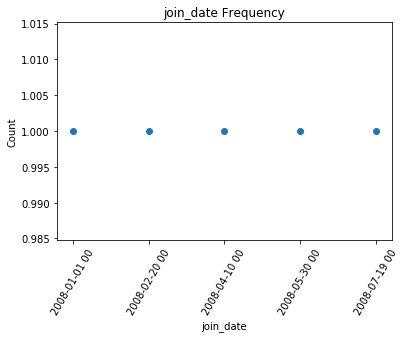

Index([u'transaction_id', u'session_id', u'transaction_time', u'product_id',
       u'amount'],
      dtype='object')
<type 'numpy.int32'>     500


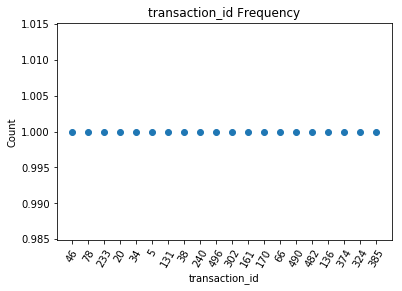

<type 'numpy.int32'>     500


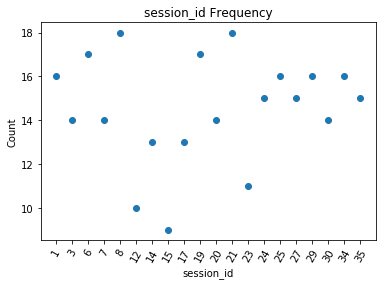

<class 'pandas._libs.tslibs.timestamps.Timestamp'>     500


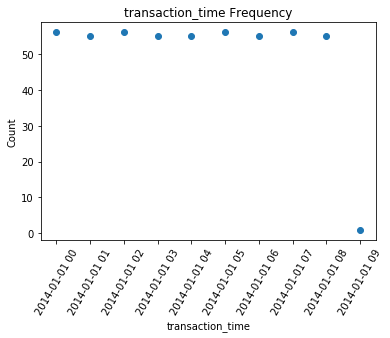

<type 'numpy.int64'>     500


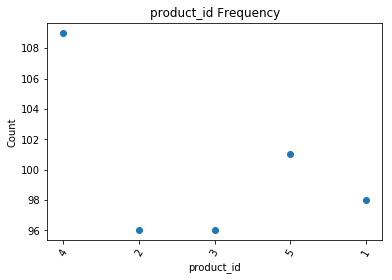

<type 'numpy.float64'>     500


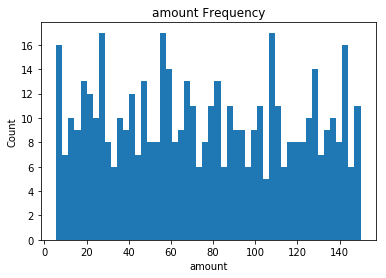

Index([u'product_id', u'brand'], dtype='object')
<type 'numpy.int64'>     5


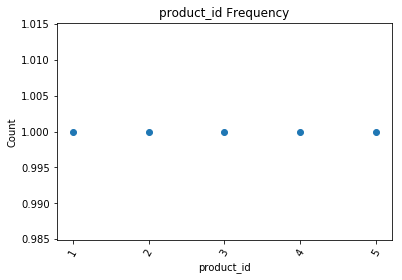

<type 'str'>     5


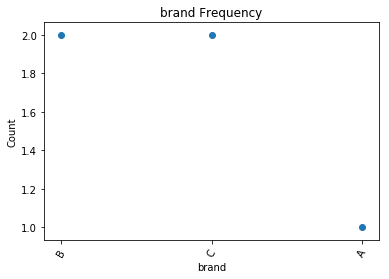

Index([u'session_id', u'customer_id', u'device', u'session_start'], dtype='object')
<type 'numpy.int32'>     35


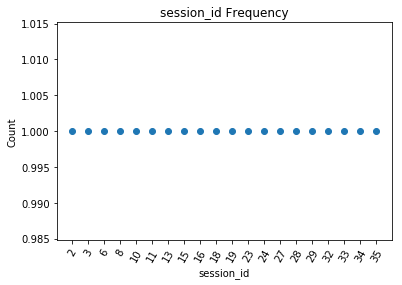

<type 'numpy.int32'>     35


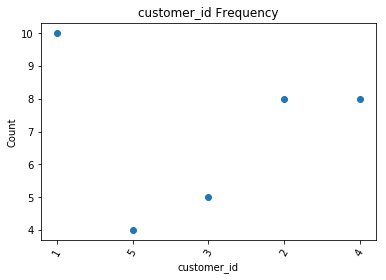

<type 'str'>     35


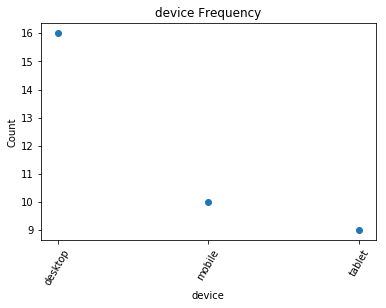

<class 'pandas._libs.tslibs.timestamps.Timestamp'>     35


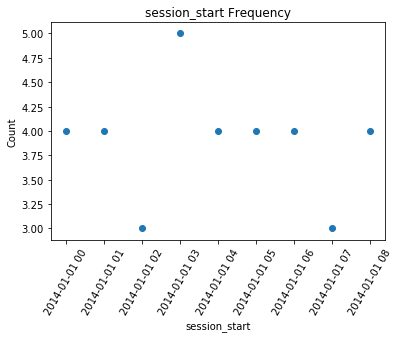

In [11]:
def qualtoquant(set):
    aset = np.array(set)
    if type(aset[0]) == np.datetime64:
        aset = pd.DatetimeIndex(aset)
        aset = aset.strftime('%Y-%m-%d %H')
    cat = []
    count = []
    for p in aset:
        if p not in cat:
            cat.append(p)
            count.append(np.size(np.where(aset == p)))
    cat = np.array(cat)
    count = np.array(count)
    while np.size(cat) > 20:
        i = np.random.randint(np.size(cat))
        cat = np.delete(cat, i, 0)
        count = np.delete(count, i, 0)
    return [cat, count]

def plotstuff(dataset):
    keynames = dataset.keys()
    print keynames
    
    numcats = len(keynames)
    
    for i in range(numcats):
        thisset = dataset[keynames[i]]
        print type(thisset[0]), "   ", np.size(thisset)
        if type(thisset[0]) == np.float64 or type(thisset[0]) == np.float32:
            plt.hist(thisset, bins = np.size(thisset)/10)
            plt.title(keynames[i] + ' Frequency')
            plt.ylabel('Count')
            plt.xlabel(keynames[i])
            plt.show()
        else:
            categories, counts = qualtoquant(thisset)
            plt.scatter(range(1, np.size(counts)+1), counts)
            plt.title(keynames[i] + ' Frequency')
            plt.ylabel('Count')
            plt.xlabel(keynames[i])
            plt.xticks(range(1, np.size(counts)+1), categories, rotation=60)
            plt.show()
    
for k in data.keys():
    thisset = data[k]
    plotstuff(thisset)

In [10]:
print "Fin."

Fin.
